In [1]:
import pandas as pd
import seaborn as sns

from files import read_stock_files, write_transaction_file, read_transaction_file
from trade import evaluate_transactions

In [2]:
transactions = read_transaction_file('../test_small.txt')

In [3]:
stocks_df = read_stock_files('../Stocks')

100%|██████████| 7195/7195 [00:26<00:00, 267.86it/s]


In [4]:
# drop stocks with less than a year of data
stocks_df = stocks_df.groupby('Name').filter(lambda x: len(x) >= 252)

# drop rows
stocks_df.drop(
    index=stocks_df.loc[
        (stocks_df[["Low", "High", "Open", "Close", "Volume"]] <= 0).any(axis=1) | 
        (stocks_df['Low'] > stocks_df['High']) | 
        (stocks_df['Volume'] < 10) | 
        (stocks_df['High'] > 10 * stocks_df['Low'])
    ].index,
    inplace=True,
)
stocks_df.drop(columns=["OpenInt"], inplace=True)
stocks_df.set_index(["Date", "Name"], inplace=True)
stocks_df.sort_index(level="Date", ascending=True, inplace=True)


In [5]:
stocks_df['IntraDayDiff_Volume'] = (stocks_df['High'] - stocks_df['Low']) * stocks_df['Volume'] * 0.1

In [43]:
prior_1970 = stocks_df.query("Date < '1970-01-01'")

245.0

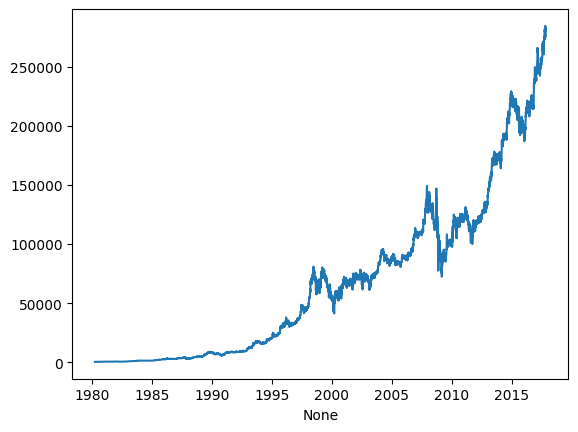

In [6]:
some_stock = stocks_df.query("Name == 'brk-a'")['Close']
x, y = some_stock.index.map(lambda x: x[0]), some_stock.values
sns.lineplot(x=x, y=y)
y.min()

<Axes: xlabel='None'>

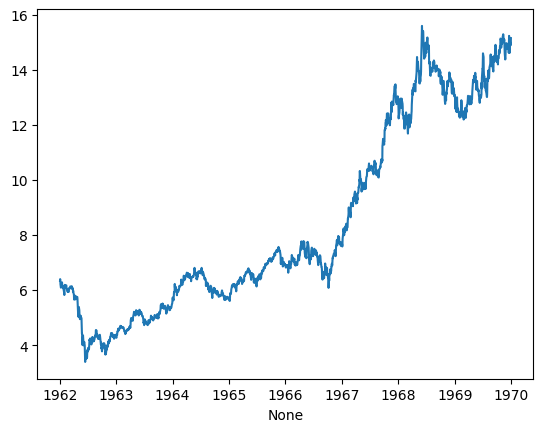

In [61]:
ibm_prior_1970 = prior_1970.query("Name == 'ibm'")['Close']
x, y = ibm_prior_1970.index.map(lambda x: x[0]), ibm_prior_1970.values
sns.lineplot(x=x, y=y)

<Axes: xlabel='None'>

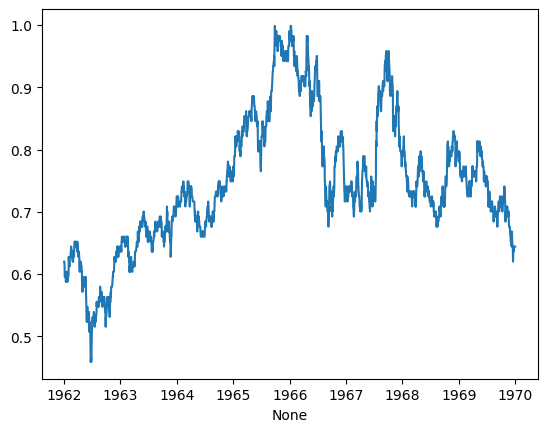

In [63]:
ge_prior_1970 = prior_1970.query("Name == 'ge'")['Close']
x, y = ge_prior_1970.index.map(lambda x: x[0]), ge_prior_1970.values
sns.lineplot(x=x, y=y)

In [7]:
prior_1970.loc[
    ((prior_1970["Open"] == prior_1970["Low"]) | (stocks_df['Close'] == stocks_df['High'])) & (prior_1970["IntraDayDiff_Volume"] > 10)
].sort_values(by="IntraDayDiff_Volume", ascending=False)

NameError: name 'prior_1970' is not defined

In [8]:
grouped_by_stock = stocks_df.groupby(level=[1])

dff = pd.DataFrame({
    "High": grouped_by_stock['High'].max(),
    "DateHigh": grouped_by_stock['High'].idxmax().apply(lambda i: i[0]),
    "Low": grouped_by_stock['Low'].min(),
    "DateLow": grouped_by_stock['Low'].idxmin().apply(lambda i: i[0]),
})
dff['Diff'] = (dff['High'] - dff['Low'])/dff['Low']
dff = dff.loc[dff['DateHigh'] > dff['DateLow'] ]

In [10]:
dff.sort_values(by='Diff', ascending=False).head(60)

,High,DateHigh,Low,DateLow,Diff
Name,,,,,
wmt,91.6900,2017-11-10,0.00821,1974-12-04,11167.087698
inpx,605.9700,2011-05-12,0.07500,2009-07-30,8078.600000
intc,60.7440,2000-08-24,0.00791,1972-01-14,7678.393173
hd,167.9400,2017-10-26,0.02585,1981-09-22,6495.711799
mo,76.9690,2017-06-20,0.01462,1970-02-05,5263.637483
aumn,28.9000,2010-11-30,0.01000,2009-04-23,2889.000000
amgn,191.1000,2017-09-14,0.07015,1984-11-16,2723.162509
biib,442.3000,2015-03-20,0.32239,1994-12-14,1370.940817
msft,86.2000,2017-10-27,0.06720,1986-03-13,1281.738095


0.18621

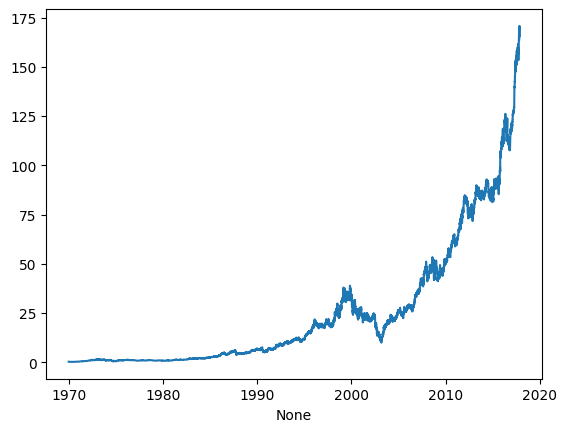

In [16]:
some_stock = stocks_df.query("Name == 'mcd'")['Close']
x, y = some_stock.index.map(lambda x: x[0]), some_stock.values
sns.lineplot(x=x, y=y)
y.min()

In [155]:
# intra buy open sell high
stocks_df.loc[
    (stocks_df["Open"] == stocks_df["Low"]) & (stocks_df["IntraDayDiff_Volume"] > 1000)
].sort_values(by="IntraDayDiff_Volume", ascending=False).index.map(lambda x: x[0])#.sort_values()[:100]

DatetimeIndex(['2008-10-10', '2001-09-17', '2009-03-10', '2008-09-16',
               '2008-10-24', '2009-02-24', '2005-09-15', '2014-01-10',
               '2008-01-22', '2004-12-02',
               ...
               '2012-04-18', '1992-11-05', '2017-08-21', '2005-10-24',
               '2015-09-25', '2013-02-20', '2013-05-24', '2008-05-14',
               '2015-04-23', '2008-01-29'],
              dtype='datetime64[ns]', length=890335, freq=None)

In [144]:
# intra buy low sell close
stocks_df.loc[(stocks_df['Close'] == stocks_df['High']) & (stocks_df['IntraDayDiff_Volume'] > 10)].sort_values(by='IntraDayDiff_Volume', ascending=False)

,,Open,High,Low,Close,Volume,IntraDayDiff_Volume
Date,Name,,,,,,
2009-03-10,brk-b,46.500,55.100,46.500,55.100,251250002,2.160750e+08
2009-05-08,wfc,19.978,23.428,19.813,23.428,575130973,2.079098e+08
2008-11-13,brk-b,66.020,68.500,62.220,68.500,215250000,1.351770e+08
2009-05-04,wfc,16.992,20.163,16.845,20.163,353689292,1.173541e+08
2008-09-19,brk-b,89.800,91.900,85.600,91.900,175249999,1.104075e+08
...,...,...,...,...,...,...,...
2013-08-06,byfc,0.800,0.800,0.760,0.800,2500,1.000000e+01
2011-06-03,nviv,2.800,3.000,2.800,3.000,500,1.000000e+01
2006-06-15,plg,14.500,14.900,14.500,14.900,250,1.000000e+01


In [72]:
sorted_df = stocks_df.sort_values(by='IntraDayDiff_Volume', ascending=False)


,,Open,High,Low,Close,Volume,IntraDayDiff_Volume
Date,Name,,,,,,
2016-01-15,smbk,199999.9900,199999.9900,15.0100,15.5500,35836,7.166662e+08
2010-02-11,brk-b,74.5000,76.8000,74.1500,76.6900,2304018600,6.105649e+08
2016-03-09,bofil,182681.4100,182681.4100,22.3420,22.4870,30671,5.602336e+08
2008-10-10,brk-b,60.0000,76.9600,60.0000,75.6000,326250002,5.533200e+08
2015-10-21,vrx,148.0000,148.6600,88.5000,118.6100,88607800,5.330645e+08
2010-02-01,brk-b,77.7900,78.0000,74.6200,75.4100,1313149400,4.438445e+08
1999-12-07,aaba,74.0000,88.2500,71.5300,87.0000,265354400,4.436726e+08
2008-09-18,ms,18.3250,22.4250,10.6150,20.4560,354456409,4.186130e+08
2012-05-18,fb,42.0500,45.0000,38.0000,38.2300,580438450,4.063069e+08


In [87]:
sorted_df.head(100).index.map(lambda x: x[1]).unique()

Index(['smbk', 'brk-b', 'bofil', 'vrx', 'aaba', 'ms', 'fb', 'gs', 'dal', 'stt',
       'aapl', 'baba', 'c', 'v', 'nvda', 'googl', 'bac', 'wfc', 'bidu', 'wcg',
       'nflx', 'twx', 'qcom', 'aig', 'csco', 'amzn', 'jci', 'viav', 'tgen',
       'jnpr', 'srpt', 'plug', 'bp', 'shpg', 'jpm', 'pfe'],
      dtype='object')

In [4]:
portfolio = evaluate_transactions(stocks_df, transactions)
print(portfolio.get_balance()) # 570.371,72741 
print(portfolio.get_evaluation(stocks_df, '2017-11-01')) 

Transaction(day='1962-06-27', transaction_type='buy-low', stock='ge', count=2)
Open      4.590200e-01
High      4.669000e-01
Low       4.590200e-01
Close     4.669000e-01
Volume    2.122467e+06
Name: (1962-06-27 00:00:00, ge), dtype: float64
Transaction(day='1965-12-31', transaction_type='sell-high', stock='ge', count=2)
Open      9.903000e-01
High      9.984000e-01
Low       9.822000e-01
Close     9.822000e-01
Volume    2.444411e+06
Name: (1965-12-31 00:00:00, ge), dtype: float64
Transaction(day='1970-05-27', transaction_type='buy-low', stock='ge', count=4)
Open      5.074000e-01
High      5.313000e-01
Low       4.989200e-01
Close     5.233000e-01
Volume    6.546261e+06
Name: (1970-05-27 00:00:00, ge), dtype: float64
Transaction(day='1973-01-11', transaction_type='sell-high', stock='ge', count=4)
Open      1.223800e+00
High      1.264100e+00
Low       1.223800e+00
Close     1.223800e+00
Volume    5.729467e+06
Name: (1973-01-11 00:00:00, ge), dtype: float64
Transaction(day='1974-09-13'

In [12]:
import numpy as np
stocks_df.loc[stocks_df['Close'].isna()]

,,Open,High,Low,Close,Volume
Date,Name,,,,,
